In [1]:
import tweepy
import pandas as pd
import numpy as np
import json
import re
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import collections
import itertools

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%run ./keys.ipynb

In [4]:
callback_uri = 'oob'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
auth.set_access_token(access_token,access_token_secret)

In [6]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [40]:
tweets = []
likes = []
geo='-33.865143,151.209900,50km'
for tweet in tweepy.Cursor(api.search, q='woolworths', 
                           geocode=geo, 
                           until = "2021-06-30",
                           include_rts='false').items(100):
        tweets.append(tweet.text)
        likes.append(tweet.favorite_count)

tweets = pd.DataFrame(tweets, columns = ['text'])

In [41]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT: ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [42]:
tweets['text']=tweets['text'].apply(cleanUpTweet)

In [43]:
tweets['text'] = tweets['text'].str.lower()
stop_words = set(stopwords.words('english'))

In [44]:
tweets['text'] = [' '.join([w for w in x.lower().split() if w not in stop_words])
               for x in tweets['text'].tolist()]

In [45]:
num = 3

In [46]:
tweets['text'] = tweets['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>num]))

In [47]:
phrases = tweets['text'].apply(lambda x: list(ngrams(x.split(), num)))

In [48]:
all_phrases = list(itertools.chain(*phrases))
counts = collections.Counter(all_phrases)

In [49]:
most_count = pd.DataFrame(counts.most_common(50),
                         columns = ['phrases of 3', 'count'])
most_count['phrases of 3'] = most_count['phrases of 3'].apply(lambda x: ' '.join([w for w in x]))
most_count.head()

,phrases of 3,count
0,woolworths forced reintroduce,18
1,forced reintroduce buying,18
2,reintroduce buying limits,18
3,buying limits toilet,18
4,limits toilet paper,18


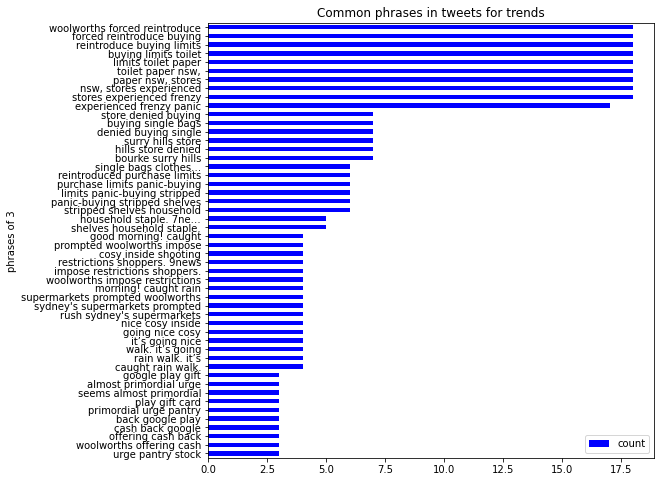

In [50]:
fig, ax = plt.subplots(figsize=(8,8))

most_count.sort_values(by='count').plot.barh(x='phrases of 3',
                                             y='count',
                                             ax=ax,
                                             color="blue")
ax.set_title("Common phrases in tweets for trends")
plt.show()